In [ ]:
%%shell
jupyter nbconvert --to html /content/Statistic.ipynb

[NbConvertApp] Converting notebook /content/Statistic.ipynb to html
[NbConvertApp] Writing 717603 bytes to /content/Statistic.html


![image.png]()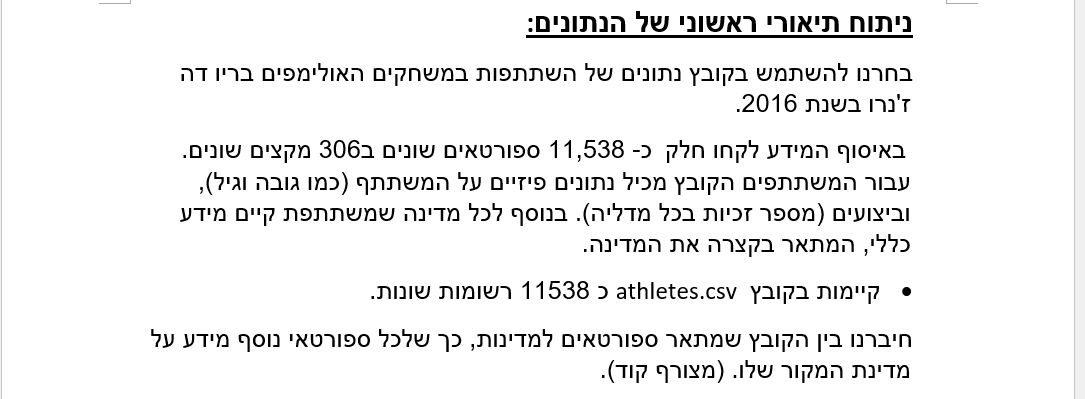

#קישור לקובץ הנתונים :
 https://www.kaggle.com/datasets/rio2016/olympic-games 

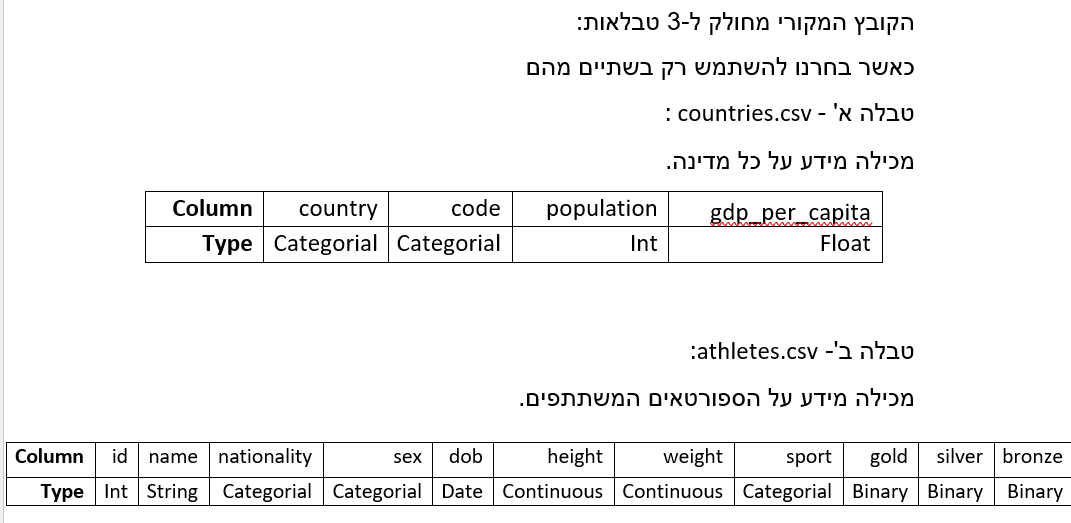

#**:עבור הקובץ הסופי**

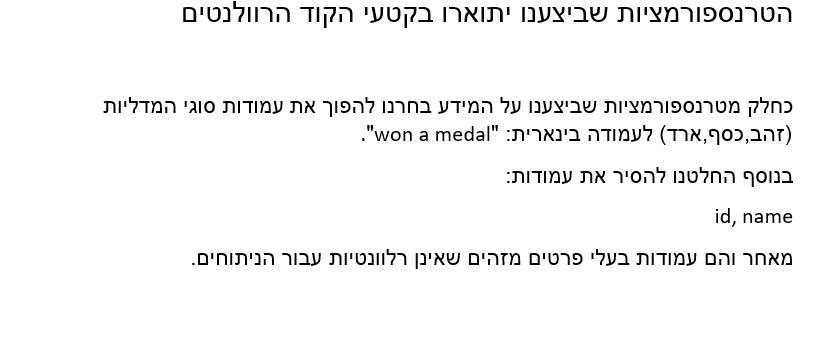

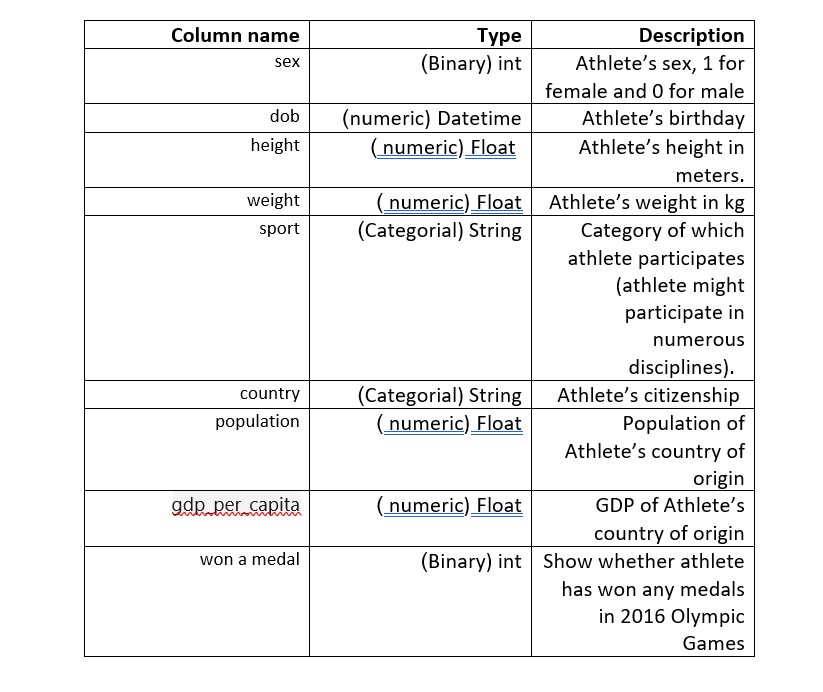

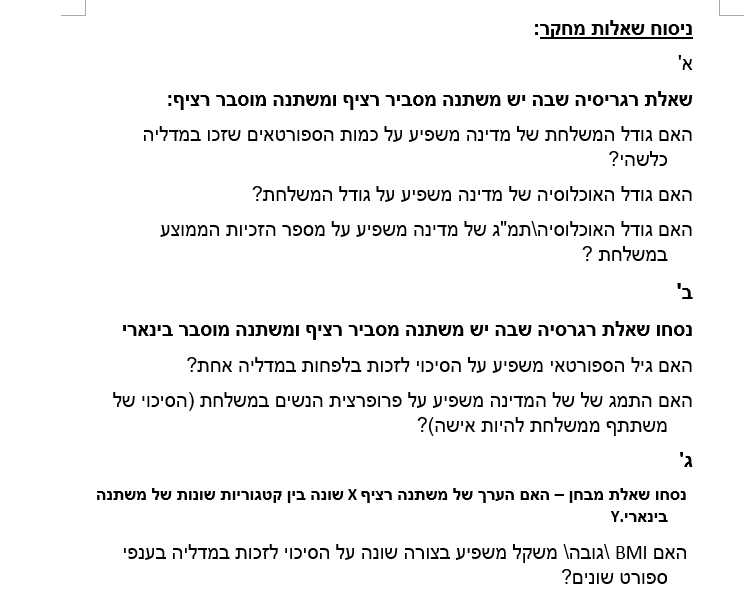

# **:קטעי הקוד שנעזרנו בהם**

In [ ]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

file1 = 'athletes.csv'
file2 = 'countries.csv'

athletes=pd.read_csv(file1)
countries = pd.read_csv(file2)
countries.rename(columns = {'code':'nationality'}, inplace = True)

full_athlete_df = pd.merge(athletes,countries,how='inner',on ='nationality')
full_athlete_df['sex'] = full_athlete_df.sex.map(dict(female=1, male=0))

full_athlete_df['Won a medal'] = full_athlete_df['gold'] + full_athlete_df['silver'] + full_athlete_df['bronze']
full_athlete_df['Won a medal'].values[full_athlete_df['Won a medal'].values > 0] = 1
full_athlete_df['dob'] = pd.to_datetime(full_athlete_df.dob)
full_athlete_df['dob'] = full_athlete_df['dob'].mask(full_athlete_df['dob'].dt.year > 2016,
                                               full_athlete_df['dob'] - pd.DateOffset(years=100))
full_athlete_df.drop(['gold', 'silver','bronze','id','name','nationality'], axis=1)



,sex,dob,height,weight,sport,country,population,gdp_per_capita,Won a medal
0,0,1969-10-17,1.72,64.0,athletics,Spain,46418269.0,25831.582305,0
1,1,1988-12-14,1.80,62.0,athletics,Spain,46418269.0,25831.582305,0
2,0,1991-08-30,1.75,67.0,athletics,Spain,46418269.0,25831.582305,0
3,0,1990-12-05,1.82,71.0,athletics,Spain,46418269.0,25831.582305,0
4,0,1987-09-17,1.93,89.0,volleyball,Spain,46418269.0,25831.582305,0
...,...,...,...,...,...,...,...,...,...
11226,0,1991-12-18,1.74,73.0,judo,Yemen,26832215.0,1406.291651,0
11227,1,1992-08-21,1.70,57.0,athletics,Swaziland,1286970.0,3200.143018,0
11228,0,1988-05-02,1.80,82.0,athletics,Swaziland,1286970.0,3200.143018,0
11229,1,1994-04-05,1.73,65.0,athletics,Dominica,72680.0,7116.386392,0


כחלק מטרנספורמציות שביצענו על המידע בחרנו להפוך את העמודות של סוגי המדליות (זהב,כסף,ארד) לעמודה בינארית:

 "won a medal"

בנוסף החלטנו להסיר את עמודות:

id, name 

מאחר והם עמודות בעלי פרטים מזהים שאינן רלוונטיות עבור הניתוחים.

#תיאור ערכים חסרים:

In [ ]:
# Adressing nan:
total_nan=0
print("Number of missing values per column:")
for column in full_athlete_df.columns:
  counter=0
  for val in full_athlete_df[column]:
    if pd.isna(val):
      counter+=1
  total_nan+=counter
  print(column+":", counter)
print("Total number of missing values: ", total_nan)
print("\nTotal number of rows with missing values:",full_athlete_df.shape[0]-full_athlete_df.dropna(axis=0).shape[0])

Number of missing values per column:
id: 0
name: 0
nationality: 0
sex: 0
dob: 1
height: 321
weight: 646
sport: 0
gold: 0
silver: 0
bronze: 0
country: 0
population: 83
gdp_per_capita: 509
Won a medal: 0
Total number of missing values:  1560

Total number of rows with missing values: 1122


#תיאור ערכים סטטיסטים עבור המשתנים הנומריים:





In [ ]:
full_athlete_df[["height","weight","population","gdp_per_capita"]].describe()

,height,weight,population,gdp_per_capita
count,10910.000000,10585.000000,1.114800e+04,10722.000000
mean,1.765469,71.974398,1.263067e+08,25214.307173
std,0.112337,16.110382,2.851921e+08,20074.211574
min,1.210000,31.000000,1.022200e+04,277.068309
25%,1.690000,60.000000,1.055122e+07,8027.683810
50%,1.760000,70.000000,4.341676e+07,19222.150076
75%,1.840000,80.000000,8.141314e+07,42311.036231
max,2.210000,170.000000,1.371220e+09,101449.968168


[Text(0.5, 0, 'Date of birth'), Text(0.5, 1.0, 'Date of Birth Histograma')]

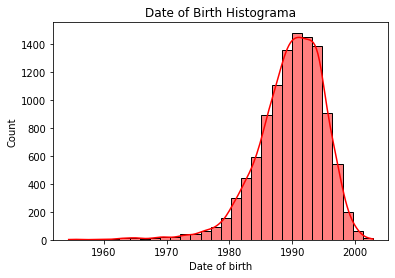

In [ ]:
sns.histplot(full_athlete_df['dob'],bins = 30,kde = True,color = 'red').set(xlabel = 'Date of birth',title = "Date of Birth Histograma")

היסטוגרמה עבור הגובה של הספורטאים

[Text(0.5, 1.0, 'Height Histograma')]

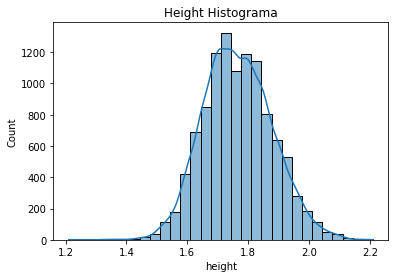

In [ ]:
sns.histplot(full_athlete_df['height'],bins = 30,kde = True).set(title = 'Height Histograma',)

ההיסטוגרמה הנ"ל דומה בקירוב להתפלגות נורמלית

[Text(0.5, 1.0, 'Weight Histograma')]

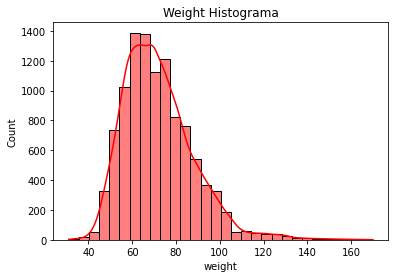

In [ ]:
sns.histplot(full_athlete_df['weight'],bins = 30,kde = True,color = 'red').set(title = 'Weight Histograma',)

ההיסטוגרמה הנ"ל דומה בקירוב להתפלגות נורמלית עם זנב ימני


[Text(0.5, 0, 'Population in billion'),
 Text(0.5, 1.0, 'Population by countries')]

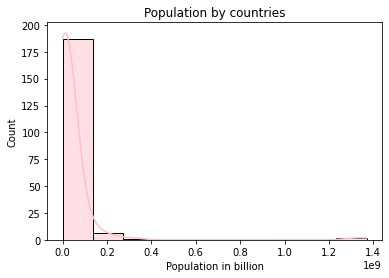

In [ ]:
sns.histplot(countries['population'],bins = 10,kde = True,color = 'pink').set(xlabel = 'Population in billion',title='Population by countries')

[Text(0.5, 0, 'Population in billion'),
 Text(0.5, 1.0, 'Population by athlete')]

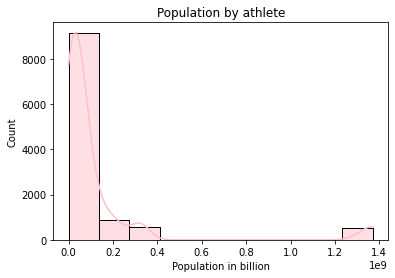

In [ ]:
sns.histplot(full_athlete_df['population'],bins = 10,kde = True,color = 'pink').set(xlabel = 'Population in billion',title='Population by athlete')

שתי ההיסטוגרמות הנ"ל מציגות את התפלגות גודל האוכלוסייה של המדינות המשתתפות, כאשר הגרף הראשון מציג את ההתפלגות ביחס למספר המדינות המשתתפות, ואילו הגרף השני מציג עבור כל ספורטאי את גודל האוכלוסייה במדינתו. מהגרף השני ניתן להבחין כי ישנה כמות גבוהה של ספורטאים ביחס למדינה - עבור מדינות עם מעל 1.2 מיליארד אזרחים

[Text(0.5, 1.0, 'GDP Boxplot')]

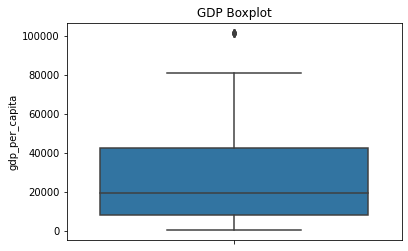

In [ ]:
sns.boxplot(y=full_athlete_df['gdp_per_capita']).set(title = 'GDP Boxplot')

In [ ]:
df1 = full_athlete_df[(full_athlete_df.gdp_per_capita>100000)]
df1

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze,country,population,gdp_per_capita,Won a medal
10992,25695000,Chantal Hoffmann,LUX,1,1987-10-30,1.67,62.0,cycling,0,0,0,Luxembourg,569676.0,101449.968168,0
10993,557871221,Charles Grethen,LUX,0,1992-06-02,1.80,68.0,athletics,0,0,0,Luxembourg,569676.0,101449.968168,0
10994,932285565,Charline Mathias,LUX,1,1992-05-23,1.73,60.0,athletics,0,0,0,Luxembourg,569676.0,101449.968168,0
10995,348981852,Christine Majerus,LUX,1,1987-02-25,1.74,57.0,cycling,0,0,0,Luxembourg,569676.0,101449.968168,0
10996,715378085,Frank Schleck,LUX,0,1980-04-15,1.85,63.0,cycling,0,0,0,Luxembourg,569676.0,101449.968168,0
10997,462314692,Gilles Muller,LUX,0,1983-05-09,1.93,90.0,tennis,0,0,0,Luxembourg,569676.0,101449.968168,0
10998,662203262,Julie Meynen,LUX,1,1997-08-15,1.70,63.0,aquatics,0,0,0,Luxembourg,569676.0,101449.968168,0
10999,940301095,Laurent Carnol,LUX,0,1989-10-17,1.87,82.0,aquatics,0,0,0,Luxembourg,569676.0,101449.968168,0
11000,470376574,Raphael Stacchiotti,LUX,0,1992-03-09,1.83,80.0,aquatics,0,0,0,Luxembourg,569676.0,101449.968168,0
11001,304876700,Xia Lian Ni,LUX,1,1963-07-04,1.57,58.0,table tennis,0,0,0,Luxembourg,569676.0,101449.968168,0


כפי שניתן לראות לראות מהבוקס-פלוט ישנו ערך חריג אשר ערכו מעל .100,000
מהטבלה מעל ניתן להבחין כי מדובר בלוקסמבורג, נחליט להוריד את המדינה מאחר ומדובר בנסיכות קטנה המונה כחצי מיליון אזרחים ואחת המדינות העשירות בעולם.

[Text(0.5, 1.0, 'GDP Histograma')]

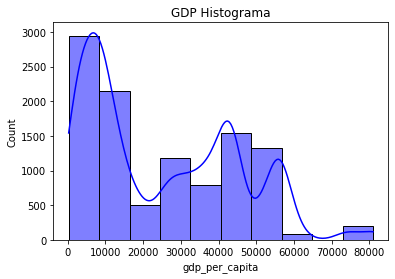

In [ ]:
df =full_athlete_df['gdp_per_capita'][(full_athlete_df.gdp_per_capita<100000)]
sns.histplot(df,bins = 10,kde = 'true',color = 'blue').set(title='GDP Histograma')

לאחר הורדת ערכים חריגים, מההיסטוגרמה לא עולה התפלגות ספציפית עבור התוצר המקומי הגולמי, אך נראה כי מרבית הספורטאים הגיעו ממדינות שהתמ"ג בהם נמוך מ10000

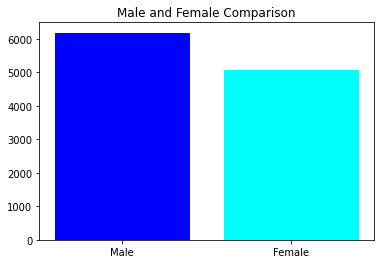

In [ ]:
 # create a dataset
female = full_athlete_df[(full_athlete_df.sex==1)].shape[0]
male = full_athlete_df[(full_athlete_df.sex==0)].shape[0]
height = [male,female]
bars = ('Male','Female')
x_pos = np.arange(len(bars))

# Create bars with different colors
plt.bar(x_pos, height, color=['blue', 'cyan'])

# Create names on the x-axis
plt.xticks(x_pos, bars)

# Show graph
plt.title('Male and Female Comparison')
plt.show()


ניתן להבחין מהגרף כי מספר הספורטאים הגברים גבוהה ממספר הספורטאיות.

In [ ]:
def makeTable(column_name):
  print(full_athlete_df[column_name].describe())
  table = pd.DataFrame()
  table["name"]=full_athlete_df[column_name].unique()
  cc= list(full_athlete_df[column_name])
  table["count"]= [cc.count(c) for c in table["name"] ]
  print()
  print(table)

In [ ]:
# column "country":
print("------Number of athletes from each country-----")
makeTable("country")


------Number of athletes from each country-----
count             11231
unique              196
top       United States
freq                567
Name: country, dtype: object

                 name  count
0               Spain    313
1        Korea, South    213
2              Canada    321
3             Moldova     23
4         New Zealand    208
..                ...    ...
191           Somalia      2
192  Papua New Guinea      8
193             Yemen      3
194         Swaziland      2
195          Dominica      2

[196 rows x 2 columns]


In [ ]:
# column "sport":
print("------Number of athletes in each type of sport------")
makeTable("sport")

------Number of athletes in each type of sport------
count         11231
unique           28
top       athletics
freq           2287
Name: sport, dtype: object

                 name  count
0           athletics   2287
1          volleyball    372
2             archery    128
3            aquatics   1397
4              rowing    524
5            handball    333
6           triathlon    110
7          basketball    264
8          equestrian    222
9              tennis    183
10           shooting    373
11         gymnastics    319
12            cycling    520
13             hockey    432
14              canoe    321
15            sailing    378
16       rugby sevens    300
17      weightlifting    252
18               golf    120
19          badminton    172
20          taekwondo    126
21               judo    381
22       table tennis    166
23             boxing    284
24          wrestling    345
25            fencing    239
26           football    611
27  modern pentathlon     7

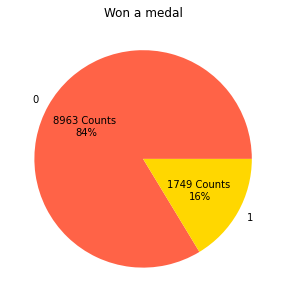

In [ ]:
# column won a medal:
fig, ax = plt.subplots(figsize=(10, 5))
label_function = lambda val: f'{val / 100 * len(df):.0f} Counts \n{val:.0f}%'

full_athlete_df.dropna(axis=0).groupby('Won a medal').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 10},
                                  colors=['tomato', 'gold'], ax=ax)
ax.set_ylabel("", size=22)
plt.title("Won a medal")
plt.show()

ניתן להבחין כי 84 אחוז מהספורטאים לא זכו במדלייה